In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [137]:
data_original = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')


In [138]:
train_Job = data_original['Job']
test_Job = data_test['Job']

In [139]:
comb = pd.concat([train_Job,test_Job])

In [140]:
comb.head()

0       Senior Eligibility Worker
1    Sr Personal Property Auditor
2                   Social Worker
3                     Firefighter
4    Pr Payroll & Personnel Clerk
Name: Job, dtype: object

In [141]:
lab_enc = preprocessing.LabelEncoder()
comb = lab_enc.fit(comb)
comb

LabelEncoder()

In [135]:
print(lab_enc.classes_)

['Account Clerk' 'Accountant I' 'Accountant II' ...
 "Worker's Compensation Adjuster" 'X-Ray Laboratory Aide'
 'Youth Comm Advisor']


In [142]:
data_original.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [143]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 21 columns):
ID                         149087 non-null int64
Year Type                  149087 non-null object
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Organization Group         149087 non-null object
Department Code            149087 non-null object
Department                 149087 non-null object
Union Code                 149087 non-null int64
Union                      149087 non-null object
Job Family Code            149087 non-null object
Job Family                 149087 non-null object
Job Code                   149087 non-null object
Job                        149087 non-null object
Employee Identifier        149087 non-null int64
Overtime                   149087 non-null float64
Other Salaries             149087 non-null float64
Retirement                 149087 non-null float64
Health/Dental              149087 non-nul

In [6]:
data_original['Year Type'].unique()

array(['Fiscal'], dtype=object)

In [7]:
data_original['Year'].unique()

array([2017, 2014, 2013, 2016, 2015])

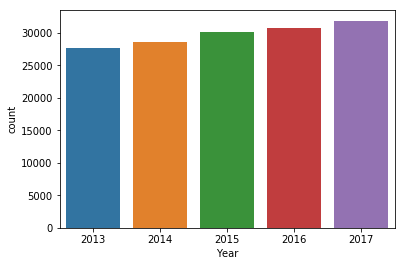

In [10]:
sns.countplot(data_original['Year'])

In [24]:
data_original[data_original['Organization Group Code']==7]['Organization Group'].unique()

array(['General City Responsibilities'], dtype=object)

In [26]:
data_original['Department Code'].unique()

array(['DSS', 'ASR', 'FIR', 'MTA', 'DPH', 'RET', 'LIB', 'POL', 'CRT',
       'HRD', 'CWP', 'PUC', 'DPW', 'JUV', 'HHP', 'AIR', 'REC', 'FAM',
       'TTX', 'WTR', 'DAT', 'TIS', 'DBI', 'CPC', 'SHF', 'ADM', 'CON',
       'BOS', 'REG', 'CAT', 'WAR', 'MYR', 'PRT', 'ECD', 'CHF', 'AAM',
       'PDR', 'HSS', 'CSS', 'CLP', 'ENV', 'ADP', 'ART', 'UNA', 'RNT',
       'ECN', 'SCI', 'HOM', 'PAB', 'HRC', 'CFC', 'CSC', 'WOM', 'ETH',
       'LLB', 'CII'], dtype=object)

In [33]:
data_original[data_original['Department Code']=='LIB']['Department'].unique()

array(['LIB Public Library'], dtype=object)

In [35]:
data_original['Union Code'].unique()

array([535,  21, 798, 790, 253, 250, 197, 351,   6,  22,  39, 911, 791,
       261, 856, 419, 792, 930,  38, 498,   4, 257, 858, 200, 236,   2,
       216, 311, 651, 251, 499, 252,   1, 323,   3, 130,  34, 195,  40,
       164, 965, 191, 330, 799, 356, 580, 254, 104, 377,  23,  16,  12,
       352, 556, 933, 121,  36, 163, 353, 929, 718, 969, 990, 793, 220,
         7, 604, 196, 302])

In [36]:
data_original[data_original['Union Code']==535]['Union'].unique()

array(['SEIU - Human Services, Local 1021'], dtype=object)

In [37]:
data_original['Job Family'].unique()

array(['Human Services', 'Appraisal & Taxation', 'Fire Services',
       'Payroll, Billing & Accounting', 'Street Transit',
       'Lab, Pharmacy & Med Techs', 'Protection & Apprehension',
       'Public Health', 'Budget, Admn & Stats Analysis',
       'Airport Operation', 'SF Superior Court', 'Management',
       'Journeyman Trade', 'Personnel', 'Med Therapy & Auxiliary',
       'Nursing', 'Police Services', 'Sub-Professional Engineering',
       'Professional Engineering', 'Supervisory-Labor & Trade',
       'Information Systems', 'Medical & Dental',
       'Housekeeping & Laundry', 'Recreation', 'Public Service Aide',
       'Agriculture & Horticulture', 'Dietary & Food', 'Skilled Labor',
       'Revenue', 'Legal & Court', 'Construction Inspection',
       'Health & Sanitation Inspection', 'Clerical, Secretarial & Steno',
       'Computer Operatns & Repro Svcs', 'Library',
       'Correction & Detention', 'Purchasing & Storekeeping',
       'Hospital Administration', 'Probation & Pa

In [38]:
data_original.columns

Index(['ID', 'Year Type', 'Year', 'Organization Group Code',
       'Organization Group', 'Department Code', 'Department', 'Union Code',
       'Union', 'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Overtime', 'Other Salaries', 'Retirement',
       'Health/Dental', 'Other Benefits', 'Total Benefits', 'Class'],
      dtype='object')

In [144]:
data = data_original.drop(['Year Type', 'Organization Group','Department', 'Union', 'Job Family Code', 'Job Code' ], axis = 1)

In [145]:
data.head()

,ID,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,2017,3,DSS,535,Human Services,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,2014,6,ASR,21,Appraisal & Taxation,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,2014,3,DSS,535,Human Services,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,2014,1,FIR,798,Fire Services,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,2013,2,MTA,790,"Payroll, Billing & Accounting",Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

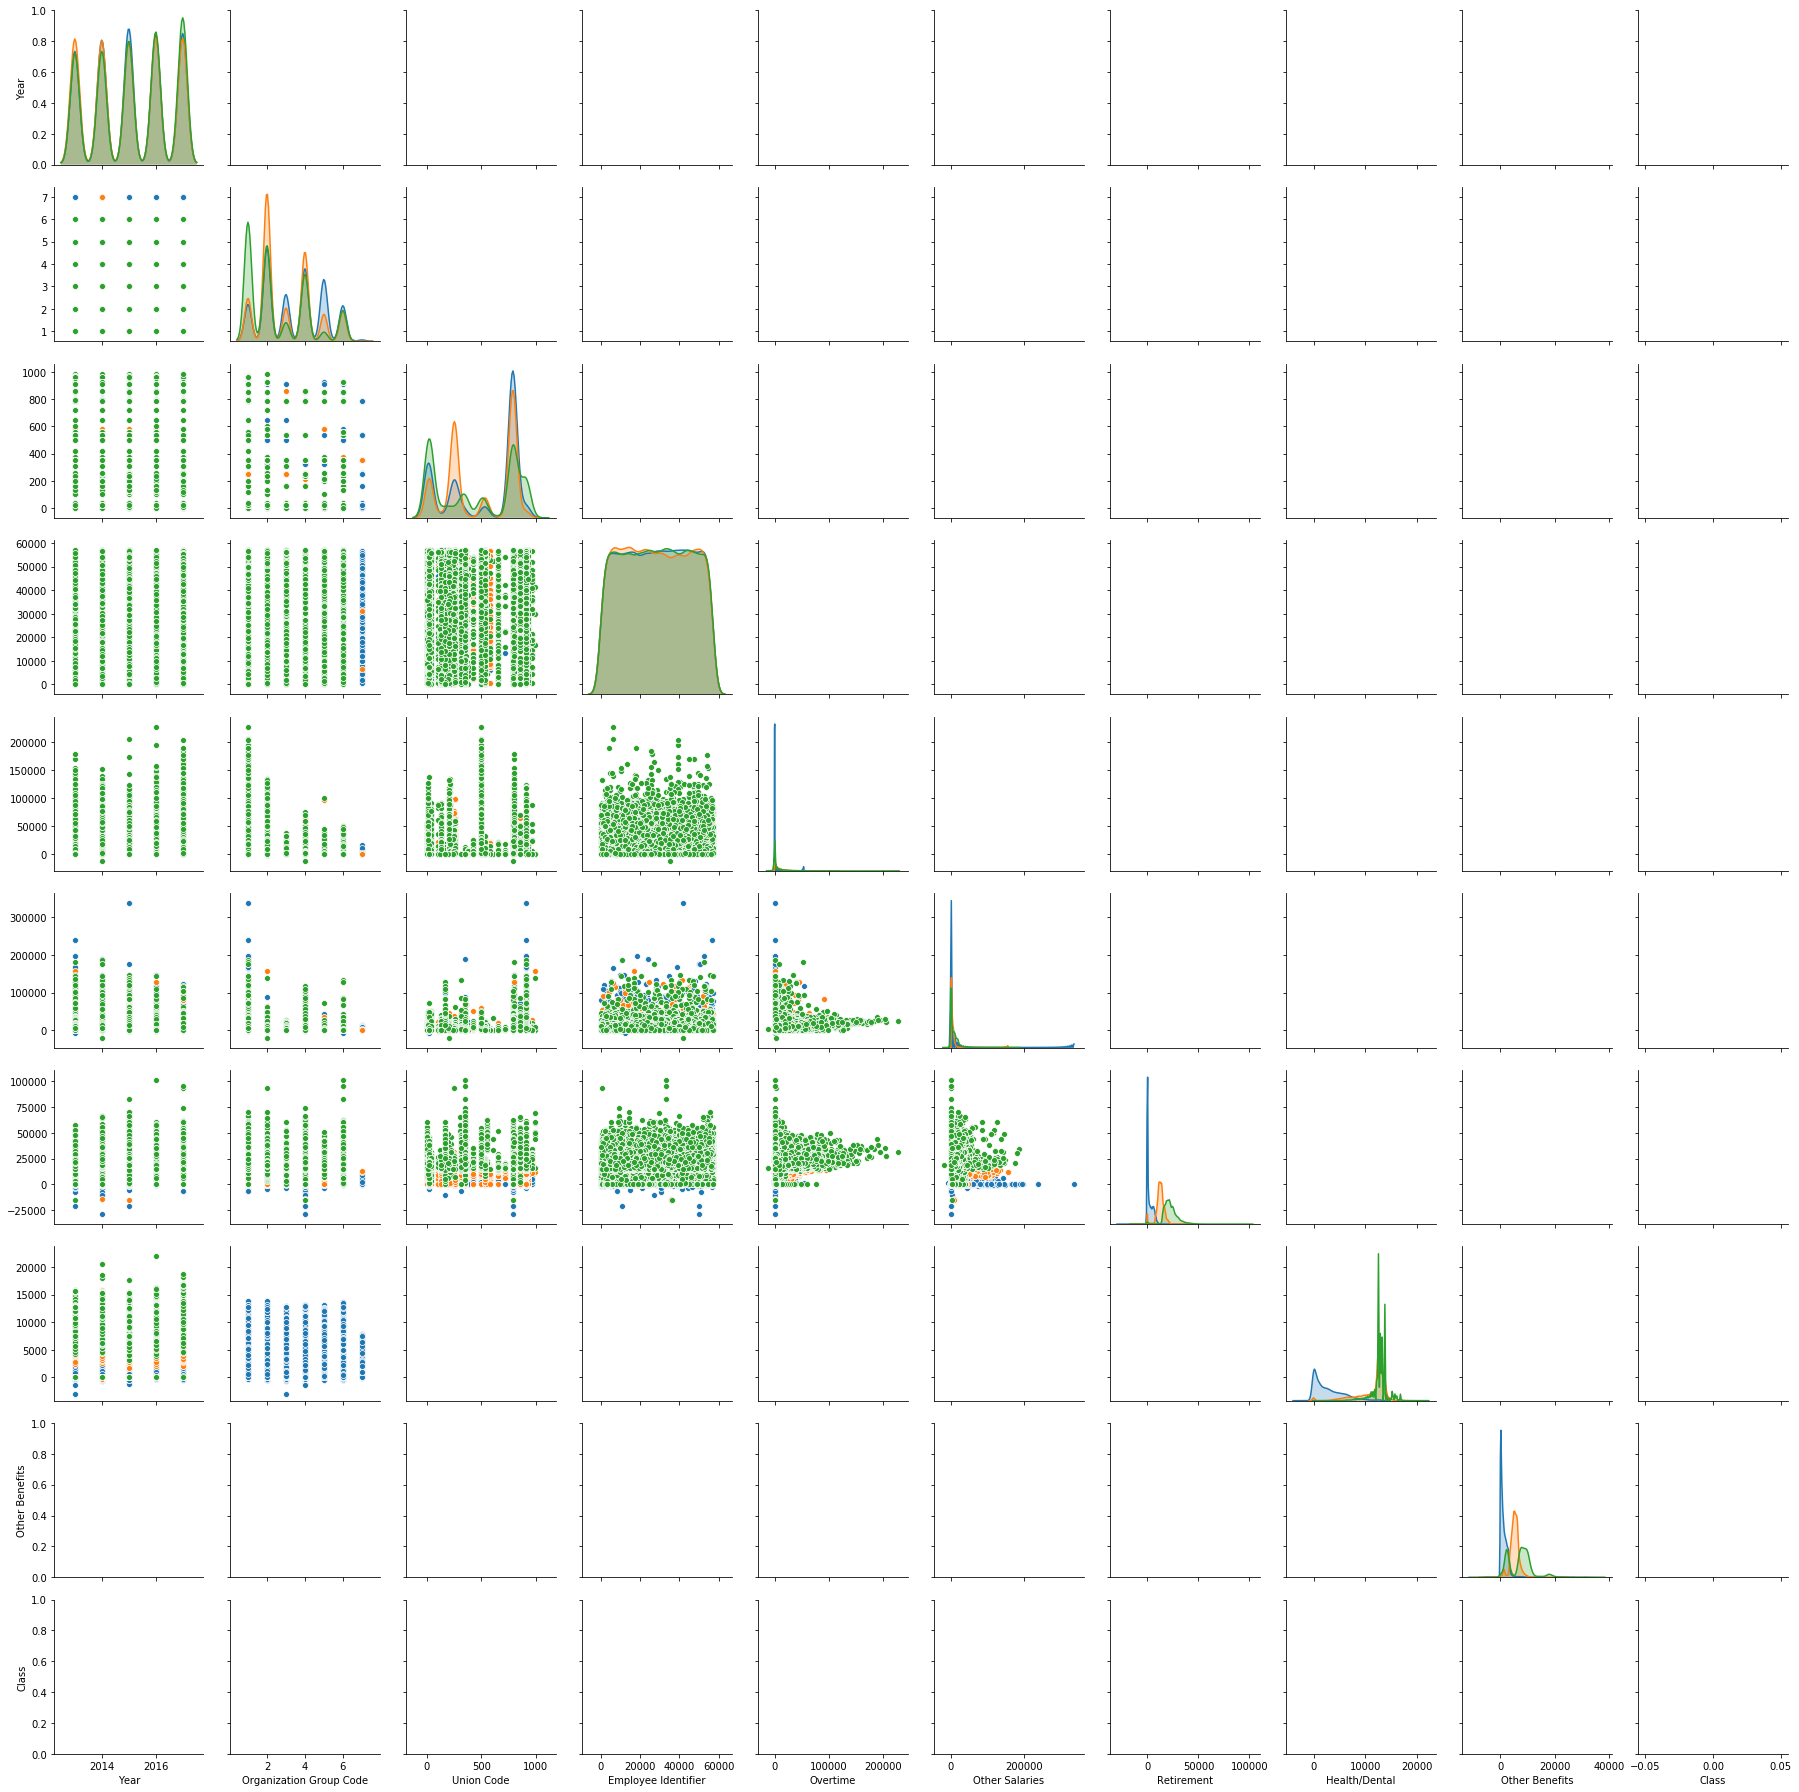

In [50]:
sns.pairplot(data, hue = 'Class');

In [146]:
data = data.drop('Total Benefits', axis = 1)

In [147]:
data.head()

,ID,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,9248,2017,3,DSS,535,Human Services,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,2
1,44541,2014,6,ASR,21,Appraisal & Taxation,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,2
2,47031,2014,3,DSS,535,Human Services,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,2
3,139416,2014,1,FIR,798,Fire Services,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,3
4,123780,2013,2,MTA,790,"Payroll, Billing & Accounting",Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,3


In [148]:
data = data.drop('ID', axis = 1)

In [149]:
data.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2017,3,DSS,535,Human Services,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,2
1,2014,6,ASR,21,Appraisal & Taxation,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,2
2,2014,3,DSS,535,Human Services,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,2
3,2014,1,FIR,798,Fire Services,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,3
4,2013,2,MTA,790,"Payroll, Billing & Accounting",Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,3


In [150]:
le = preprocessing.LabelEncoder()
data['Department Code'] = le.fit_transform(data['Department Code'])

In [151]:
data.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2017,3,22,535,Human Services,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,2
1,2014,6,5,21,Appraisal & Taxation,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,2
2,2014,3,22,535,Human Services,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,2
3,2014,1,28,798,Fire Services,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,3
4,2013,2,37,790,"Payroll, Billing & Accounting",Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,3


In [152]:
le_Job_family = preprocessing.LabelEncoder()
data['Job Family'] = le_Job_family.fit_transform(data['Job Family'])



In [153]:
data['Job'] = lab_enc.transform(data['Job'])

In [154]:
data_test['Job'] = lab_enc.transform(data_test['Job'])

In [155]:
data.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2017,3,22,535,21,889,41351,0.00,240.00,11896.36,13765.55,5248.43,2
1,2014,6,5,21,6,1015,41792,0.00,400.00,15429.94,9337.37,5599.01,2
2,2014,3,22,535,21,965,9357,0.00,1080.00,9682.00,8848.03,3463.92,2
3,2014,1,28,798,17,445,28022,25730.46,18414.18,24222.26,13911.13,2416.58,3
4,2013,2,37,790,34,787,51052,1138.28,2148.11,15437.62,12828.15,7246.54,3


In [156]:
data_test.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,"Lab, Pharmacy & Med Techs",2454,237,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,690,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,578,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,783,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,Human Services,2930,817,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 13 columns):
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Department Code            149087 non-null int64
Union Code                 149087 non-null int64
Job Family                 149087 non-null int64
Job                        149087 non-null int64
Employee Identifier        149087 non-null int64
Overtime                   149087 non-null float64
Other Salaries             149087 non-null float64
Retirement                 149087 non-null float64
Health/Dental              149087 non-null float64
Other Benefits             149087 non-null float64
Class                      149087 non-null int64
dtypes: float64(5), int64(8)
memory usage: 14.8 MB


In [157]:
emp_indenfier = data['Employee Identifier']
X = data.drop('Employee Identifier', axis = 1)
y = data['Class']

In [158]:
X = X.drop('Class', axis =1)

In [159]:
X.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits
0,2017,3,22,535,21,889,0.00,240.00,11896.36,13765.55,5248.43
1,2014,6,5,21,6,1015,0.00,400.00,15429.94,9337.37,5599.01
2,2014,3,22,535,21,965,0.00,1080.00,9682.00,8848.03,3463.92
3,2014,1,28,798,17,445,25730.46,18414.18,24222.26,13911.13,2416.58
4,2013,2,37,790,34,787,1138.28,2148.11,15437.62,12828.15,7246.54


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [72]:
lr = LogisticRegression()
sfs1 = sfs(lr, k_features = 11, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)



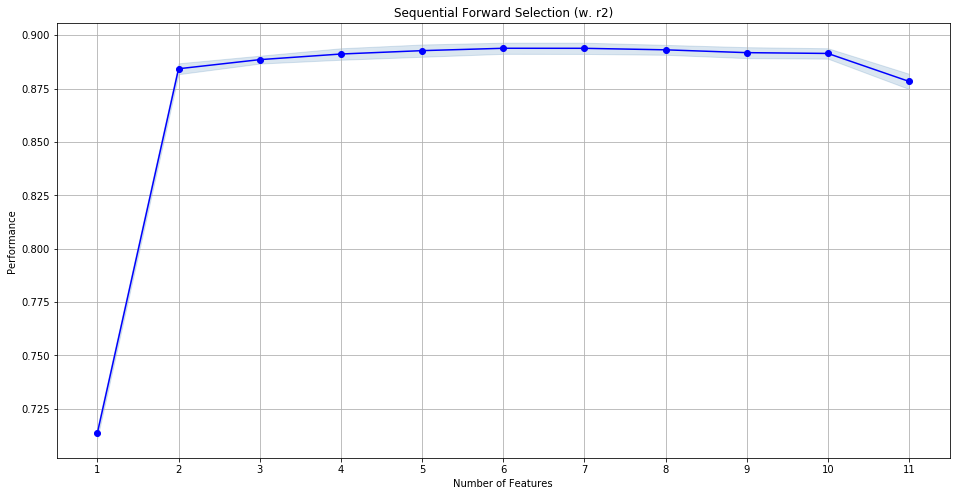

In [73]:
fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. r2)')
plt.grid()
plt.show()

In [74]:
sfs1 = sfs(lr, k_features = 6, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(X_train, y_train)
sfs1.get_metric_dict()
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 4, 5, 6, 8, 10]
['Year', 'Job Family', 'Job', 'Overtime', 'Retirement', 'Other Benefits']


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15), 'min_samples_leaf': np.arange(2,20), 'min_samples_split':np.arange(2,20)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(X_train, y_train, 5)

KeyboardInterrupt: 

In [184]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=-1,n_estimators = 500,  criterion="entropy",random_state=9999)
rfcl.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [185]:
rfcl.score(X_train,y_train)


1.0

In [186]:
rfcl.score(X_test, y_test)

1.0

In [187]:
rfcl.score(X,y)

1.0

In [224]:
from sklearn.ensemble import AdaBoostClassifier
rfcl = RandomForestClassifier(n_jobs=-1,n_estimators = 500,  criterion="gini",random_state=9999, min_samples_split=5)


In [227]:
abcl = AdaBoostClassifier(base_estimator=rfcl, n_estimators=500)

In [228]:
abcl.fit(X,y)

KeyboardInterrupt: 

In [ ]:
abcl.score(X,y)

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = {'min_samples_leaf': np.arange(2,5), 'min_samples_split':np.arange(2,5)}
    # decision tree model
    #dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    rtree_gscv = GridSearchCV(rfcl, param_grid, n_jobs=-1, cv=nfolds)
    #fit model to data
    rtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(X_train, y_train, 5)

KeyboardInterrupt: 

In [166]:
data_test = data_test.drop(['Year Type', 'Organization Group','Department', 'Union', 'Job Family Code', 'Job Code' ], axis = 1)

In [167]:
data_test = data_test.drop('Total Benefits', axis = 1)

In [168]:
data_test = data_test.drop('ID', axis = 1)

In [169]:
data_test.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits
0,2015,4,DPH,790,"Lab, Pharmacy & Med Techs",237,23148,0.0,0.00,0.00,2203.32,2014.12
1,2016,4,DPH,791,Nursing,690,8789,0.0,1689.53,31464.76,11872.83,9947.92
2,2016,5,LIB,790,Library,578,48290,0.0,932.77,8858.22,9705.96,3764.93
3,2015,1,POL,21,"Budget, Admn & Stats Analysis",783,43253,0.0,0.00,23955.61,11687.19,8880.83
4,2015,4,DPH,790,Human Services,817,13722,0.0,620.54,20644.61,12384.59,7491.65


In [170]:
data_test['Department Code'] = le.transform(data_test['Department Code'])

In [171]:
data_test.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits
0,2015,4,20,790,"Lab, Pharmacy & Med Techs",237,23148,0.0,0.00,0.00,2203.32,2014.12
1,2016,4,20,791,Nursing,690,8789,0.0,1689.53,31464.76,11872.83,9947.92
2,2016,5,35,790,Library,578,48290,0.0,932.77,8858.22,9705.96,3764.93
3,2015,1,41,21,"Budget, Admn & Stats Analysis",783,43253,0.0,0.00,23955.61,11687.19,8880.83
4,2015,4,20,790,Human Services,817,13722,0.0,620.54,20644.61,12384.59,7491.65


In [172]:

data_test['Job Family'] = le_Job_family.transform(data_test['Job Family'])



In [173]:
data_test.head()


,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits
0,2015,4,20,790,24,237,23148,0.0,0.00,0.00,2203.32,2014.12
1,2016,4,20,791,32,690,8789,0.0,1689.53,31464.76,11872.83,9947.92
2,2016,5,35,790,26,578,48290,0.0,932.77,8858.22,9705.96,3764.93
3,2015,1,41,21,7,783,43253,0.0,0.00,23955.61,11687.19,8880.83
4,2015,4,20,790,21,817,13722,0.0,620.54,20644.61,12384.59,7491.65


In [175]:
emp_id_test  = data_test['Employee Identifier']
data_test = data_test.drop('Employee Identifier',axis = 1)


In [190]:
data_test.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2015,4,20,790,24,237,0.0,0.00,0.00,2203.32,2014.12,1
1,2016,4,20,791,32,690,0.0,1689.53,31464.76,11872.83,9947.92,3
2,2016,5,35,790,26,578,0.0,932.77,8858.22,9705.96,3764.93,2
3,2015,1,41,21,7,783,0.0,0.00,23955.61,11687.19,8880.83,3
4,2015,4,20,790,21,817,0.0,620.54,20644.61,12384.59,7491.65,3


In [192]:
#emp_id_test  = data_test['Employee Identifier']
data_test2 = data_test.drop('Class', axis = 1)

In [193]:
data_test2['Class']=rfcl.predict(data_test2)
data_test2.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2015,4,20,790,24,237,0.0,0.00,0.00,2203.32,2014.12,1
1,2016,4,20,791,32,690,0.0,1689.53,31464.76,11872.83,9947.92,3
2,2016,5,35,790,26,578,0.0,932.77,8858.22,9705.96,3764.93,2
3,2015,1,41,21,7,783,0.0,0.00,23955.61,11687.19,8880.83,3
4,2015,4,20,790,21,817,0.0,620.54,20644.61,12384.59,7491.65,3


In [202]:
data_test3 = data_test.drop('Class', axis = 1)
data_test3['Class']=abcl.predict(data_test3)
data_test3.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2015,4,20,790,24,237,0.0,0.00,0.00,2203.32,2014.12,1
1,2016,4,20,791,32,690,0.0,1689.53,31464.76,11872.83,9947.92,3
2,2016,5,35,790,26,578,0.0,932.77,8858.22,9705.96,3764.93,2
3,2015,1,41,21,7,783,0.0,0.00,23955.61,11687.19,8880.83,3
4,2015,4,20,790,21,817,0.0,620.54,20644.61,12384.59,7491.65,3


In [210]:
data_test4 = data_test.drop('Class', axis = 1)
data_test4['Class']=abcl.predict(data_test4)
data_test4.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2015,4,20,790,24,237,0.0,0.00,0.00,2203.32,2014.12,1
1,2016,4,20,791,32,690,0.0,1689.53,31464.76,11872.83,9947.92,3
2,2016,5,35,790,26,578,0.0,932.77,8858.22,9705.96,3764.93,2
3,2015,1,41,21,7,783,0.0,0.00,23955.61,11687.19,8880.83,3
4,2015,4,20,790,21,817,0.0,620.54,20644.61,12384.59,7491.65,3


In [220]:
data_test5 = data_test.drop('Class', axis = 1)
data_test5['Class']=abcl.predict(data_test5)
data_test5.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family,Job,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Class
0,2015,4,20,790,24,237,0.0,0.00,0.00,2203.32,2014.12,1
1,2016,4,20,791,32,690,0.0,1689.53,31464.76,11872.83,9947.92,3
2,2016,5,35,790,26,578,0.0,932.77,8858.22,9705.96,3764.93,2
3,2015,1,41,21,7,783,0.0,0.00,23955.61,11687.19,8880.83,3
4,2015,4,20,790,21,817,0.0,620.54,20644.61,12384.59,7491.65,3


In [221]:
dummy = pd.read_csv('test.csv')
ID_col = dummy['ID']
Class_col = data_test5['Class']
dummy['Class']  = Class_col
dummy.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,...,2454,Clinical Pharmacist,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44,1
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,...,2328,Nurse Practitioner,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51,3
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,...,3610,Library Assistant,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11,2
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,...,1824,Pr Administrative Analyst,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63,3
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,...,2930,Psychiatric Social Worker,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85,3


In [222]:
a = ['ID','Class']
final = dummy[a]
final.head()

,ID,Class
0,9240,1
1,209951,3
2,29879,2
3,177914,3
4,180406,3


In [223]:
final.to_csv('result_JMD_5.csv', index = False)